# Tutorial 06 (part 2): Deep convolutional neural networks in Keras
By Dr Ivan Olier-Caparroso, Feb-22

## Introduction
The aim with this tutorial is to practise how to implement deep convolutional neural networks (CNNs) in Keras, and how to apply them to *Image Analysis*.

As in previous tutorial, we should import the required packages first. We don't need to import everything from the beginning, but it is good practice to do it so.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

## Dataset
We will use the *MNIST* dataset as previous tutorial. However, in this occassion the images won't be flattened prior to be used in the network, but they will be inputed as they are (images or arrays).
* Download the MNIST dataset from Keras as before:

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train_img, y_train_img), (X_test_img, y_test_img) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


* Let's check data dimensions as we will need them to build the network:

In [ ]:
print('X_train_img dimensions: ', X_train_img.shape)
print('y_train_img dimensions: ', y_train_img.shape)
print('X_test_img dimensions: ', X_test_img.shape)
print('y_test_img dimensions: ', y_test_img.shape)

X_train_img dimensions:  (60000, 28, 28)
y_train_img dimensions:  (60000,)
X_test_img dimensions:  (10000, 28, 28)
y_test_img dimensions:  (10000,)


MNIST images are all pre-aligned (e.g. each image only contains a hand-drawn digit). In addition, the images all have the same square size of 28×28 pixels, and all are greyscale.

CNN models (2D-CNNs, more precisely) takes 4D arrays as inputs: samples, 2D image coordinates, and channels. Colour RGB images have 3 channels (Red, Green and Blue), whilst greyscale images, 1 channel only. Therefore, we must reshape the data arrays to have a single channel:

In [ ]:
X_train = X_train_img.reshape((X_train_img.shape[0], 28, 28, 1))
X_test = X_test_img.reshape((X_test_img.shape[0], 28, 28, 1))
print('X_train dimensions: ', X_train.shape)
print('X_test dimensions: ', X_test.shape)

X_train dimensions:  (60000, 28, 28, 1)
X_test dimensions:  (10000, 28, 28, 1)


Classes in `y_train` and `y_test` are represented as unique integers: $0\ldots9$. We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes. We can achieve this with the `to_categorical()` utility function:

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train_img)
y_test = to_categorical(y_test_img)
y_train[0:5,]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Now, we should proceed with the data normalisation. As we know pixel values should go from 0 to 255, sacaling the data requires dividing the arrays by 255. The data values are integers, therfore we must convert to reals first.

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## Building the model

Now, we will build three CNN models and see how their performances are affected:

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten

In [ ]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model1.add(MaxPool2D((2,2)))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 512)               2769408   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2,774,858
Trainable params: 2,774,858
Non-trainable params: 0
______________________________________________

We design the compiler similarly to prior models.

In [ ]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Now, we have an architecture ready for training. THerefore, we can proceed with training the model:

In [ ]:
history = model1.fit(X_train, y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_split=0.2)

Epoch 1/10
375/375 - 38s - loss: 0.1983 - accuracy: 0.9424 - val_loss: 0.0750 - val_accuracy: 0.9778 - 38s/epoch - 102ms/step
Epoch 2/10
375/375 - 37s - loss: 0.0580 - accuracy: 0.9828 - val_loss: 0.0617 - val_accuracy: 0.9816 - 37s/epoch - 99ms/step
Epoch 3/10
375/375 - 37s - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0582 - val_accuracy: 0.9830 - 37s/epoch - 99ms/step
Epoch 4/10
375/375 - 39s - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.0533 - val_accuracy: 0.9841 - 39s/epoch - 103ms/step
Epoch 5/10
375/375 - 37s - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0.0516 - val_accuracy: 0.9856 - 37s/epoch - 100ms/step
Epoch 6/10
375/375 - 37s - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.0530 - val_accuracy: 0.9854 - 37s/epoch - 100ms/step
Epoch 7/10
375/375 - 37s - loss: 0.0065 - accuracy: 0.9984 - val_loss: 0.0509 - val_accuracy: 0.9862 - 37s/epoch - 100ms/step
Epoch 8/10
375/375 - 37s - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0540 - val_accuracy: 0.9863 - 37s/epoch - 99ms/

As before, we can implement a quick function to plot learning curves:

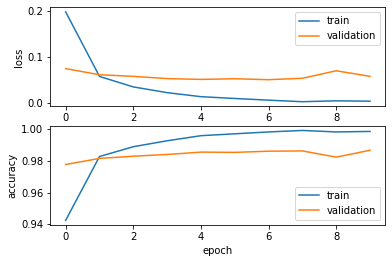

In [ ]:
def plot_history(history):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    return;

plot_history(history)

## Predicting new cases

Let's pick few cases from the test subset to see how our new model is performing.

In [ ]:
preds_prob = model1.predict(X_test[0:9,:,:,:])
preds_class = np.argmax(preds_prob, axis=1)
preds_class

array([7, 2, 1, 0, 4, 1, 4, 9, 5])

We can visualise the results too:

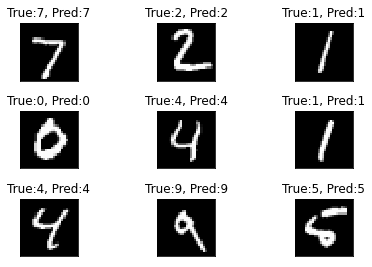

In [ ]:
plt.figure(facecolor='w')
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_test_img[i], cmap='gray', interpolation='none')
  plt.title("True:{}, Pred:{}".format(y_test_img[i],preds_class[i]))
  plt.xticks([])
  plt.yticks([])

## Model performance
Model performance is estimated similarly to prior models:

In [ ]:
test_scores_model1 = model1.evaluate(X_test, y_test, verbose=0)
print("Test loss model 1:", test_scores_model1[0])
print("Test accuracy model 1:", test_scores_model1[1])
train_scores_model1 = model1.evaluate(X_train, y_train, verbose=0)
print("Train loss model 1:", train_scores_model1[0])
print("Train accuracy model 1:", train_scores_model1[1])

Test loss model 1: 0.052724797278642654
Test accuracy model 1: 0.986299991607666
Train loss model 1: 0.014093253761529922
Train accuracy model 1: 0.9965999722480774


## Exercise
Implement two more CNN models as follows:
1. A two convolutional + max pooling layers and a one hidden dense layer model
2. Add another dense layer. Consider the use of dropout layers as a way to control for overfitting.

In [ ]:
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model2.add(MaxPool2D((2,2)))
model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model2.add(MaxPool2D((2,2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 512)              

In [ ]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
history = model2.fit(X_train, y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_split=0.2)

Epoch 1/10
375/375 - 40s - loss: 0.2220 - accuracy: 0.9344 - val_loss: 0.0801 - val_accuracy: 0.9766 - 40s/epoch - 108ms/step
Epoch 2/10
375/375 - 41s - loss: 0.0638 - accuracy: 0.9799 - val_loss: 0.0560 - val_accuracy: 0.9837 - 41s/epoch - 109ms/step
Epoch 3/10
375/375 - 33s - loss: 0.0414 - accuracy: 0.9869 - val_loss: 0.0439 - val_accuracy: 0.9876 - 33s/epoch - 87ms/step
Epoch 4/10
375/375 - 35s - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0508 - val_accuracy: 0.9854 - 35s/epoch - 94ms/step
Epoch 5/10
375/375 - 50s - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.0489 - val_accuracy: 0.9867 - 50s/epoch - 133ms/step
Epoch 6/10
375/375 - 32s - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0436 - val_accuracy: 0.9883 - 32s/epoch - 84ms/step
Epoch 7/10
375/375 - 30s - loss: 0.0134 - accuracy: 0.9958 - val_loss: 0.0380 - val_accuracy: 0.9891 - 30s/epoch - 80ms/step
Epoch 8/10
375/375 - 29s - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.0441 - val_accuracy: 0.9877 - 29s/epoch - 78ms/st

In [ ]:
def plot_history(history):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    return;

In [ ]:
preds_prob = model2.predict(X_test[0:9,:,:,:])
preds_class = np.argmax(preds_prob, axis=1)
preds_class

array([7, 2, 1, 0, 4, 1, 4, 9, 5])

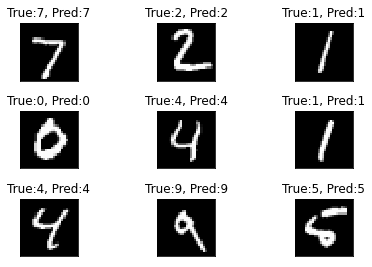

In [ ]:
plt.figure(facecolor='w')
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_test_img[i], cmap='gray', interpolation='none')
  plt.title("True:{}, Pred:{}".format(y_test_img[i],preds_class[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
test_scores_model2 = model2.evaluate(X_test, y_test, verbose=0)
print("Test loss model 2:", test_scores_model2[0])
print("Test accuracy model 2:", test_scores_model2[1])
train_scores_model2 = model2.evaluate(X_train, y_train, verbose=0)
print("Train loss model 2:", train_scores_model2[0])
print("Train accuracy model 2:", train_scores_model2[1])

Test loss model 2: 0.033744633197784424
Test accuracy model 2: 0.989300012588501
Train loss model 2: 0.012799928896129131
Train accuracy model 2: 0.996666669845581
